Problem description:

Download the catalog of galaxies from the NASA Sloan Atlas between redshifts 0.01 < z < 0.05. Plot their absolute magnitude vs. color. Select several galaxies along the red and blue sequences, and download and show their color images. For the same galaxies, download from the SDSS database their spectra. Zoom in on the Hα region and the 4000 Aregion. Comment on the major differences between the blue and red galaxies.

In [144]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [5]:
hdul = fits.open('/Users/jiarongzhu/Downloads/nsa_v0_1_2.fits')

In [24]:
z=hdul[1].data['Z']

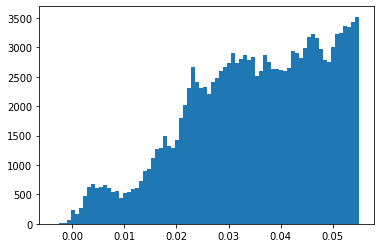

In [27]:
_ = plt.hist(z, bins='auto')  

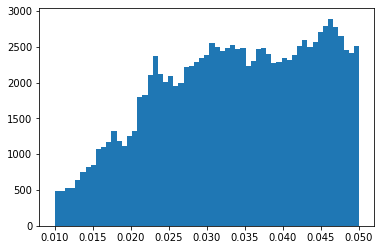

In [115]:
N = len(z)

#locate the data such that 0.01<z<0.05
index = np.where(abs(z-0.03)<0.02)  
data = hdul[1].data[index]

_ = plt.hist(data['Z'], bins='auto')  


In [116]:
mag = data['ABSMAG']  # absmag of FNugriz
x = mag[:,4]
y = mag[:,3]-mag[:,4]


(-24.0, -13.0)

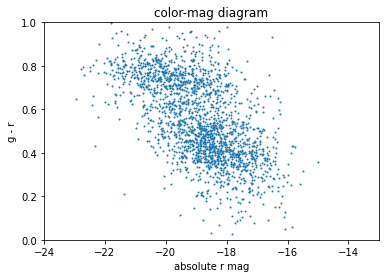

In [168]:
_ = plt.scatter(x[0:2000],y[0:2000],s=1) # I didn't use all data because I want to see the seperation of blue
# and red sequencies more clearly
plt.gca().invert_xaxis()
plt.ylabel('g - r')
plt.xlabel('absolute r mag')
plt.ylim(0,1)
plt.title('color-mag diagram')
plt.xlim(-24,-13)

In [135]:
i_red = []
i_blue = []

for i in range(len(y)):
    if abs(y[i]-0.3)<0.001: # find index of blue galaxies with g-r~0.03
        i_blue.append(i)
    elif abs(y[i]-0.8)<0.001: # find index of red galaxies with g-r~0.08
        i_red.append(i)
    
print(i_red[0:10])
print(i_blue[0:10])

[6, 27, 145, 190, 368, 966, 1320, 1915, 1940, 2186]
[71, 798, 887, 1159, 1717, 2855, 2928, 3521, 4132, 4928]


In [142]:
# randomly select 2 blue galaxies and 2 red galaxies, find their nsaid
print(data['NSAID'][27])
print(data['NSAID'][1320])
print(data['NSAID'][887])
print(data['NSAID'][3521])

46
1675
1106
5022


With the NSAID above, we can search in NASA-Sloan Atlas and get their color image as well as spectra, as shown below.

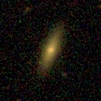

In [150]:
Image(filename='/Users/jiarongzhu/Downloads/red1.jpg')

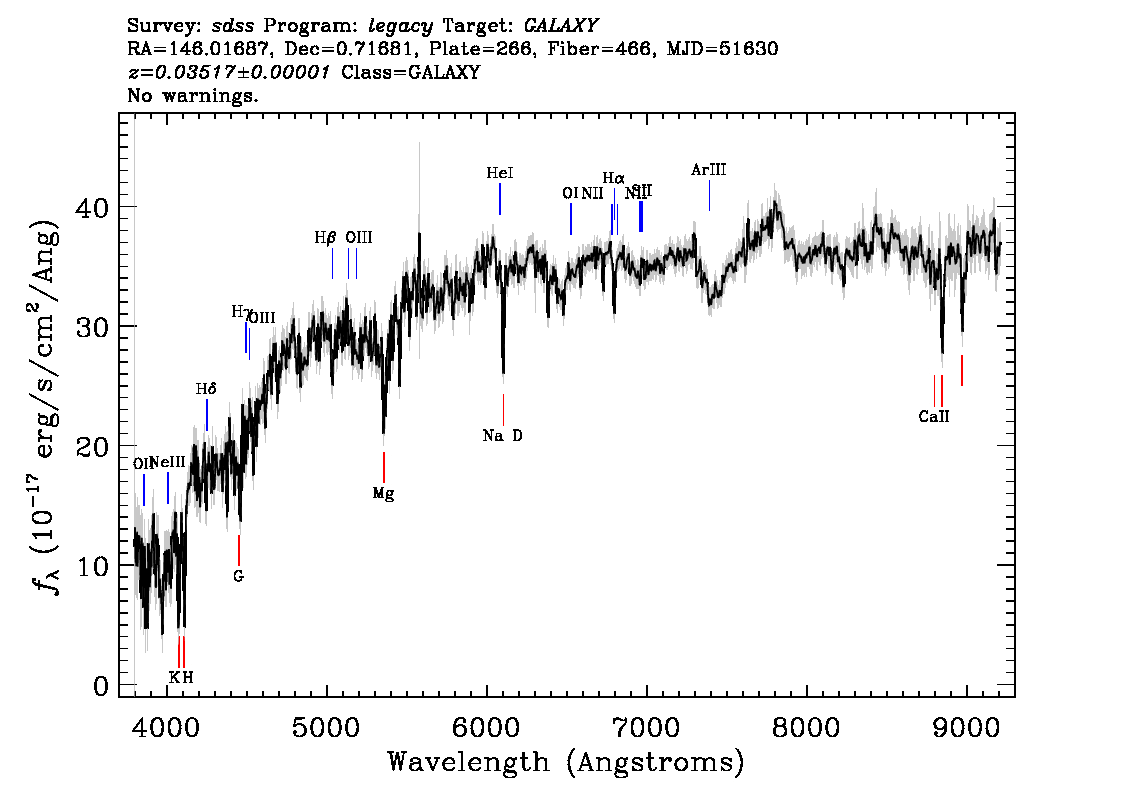

In [151]:
Image(filename='/Users/jiarongzhu/Downloads/red1_spectra.png')

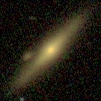

In [152]:
Image(filename='/Users/jiarongzhu/Downloads/red2.jpg')

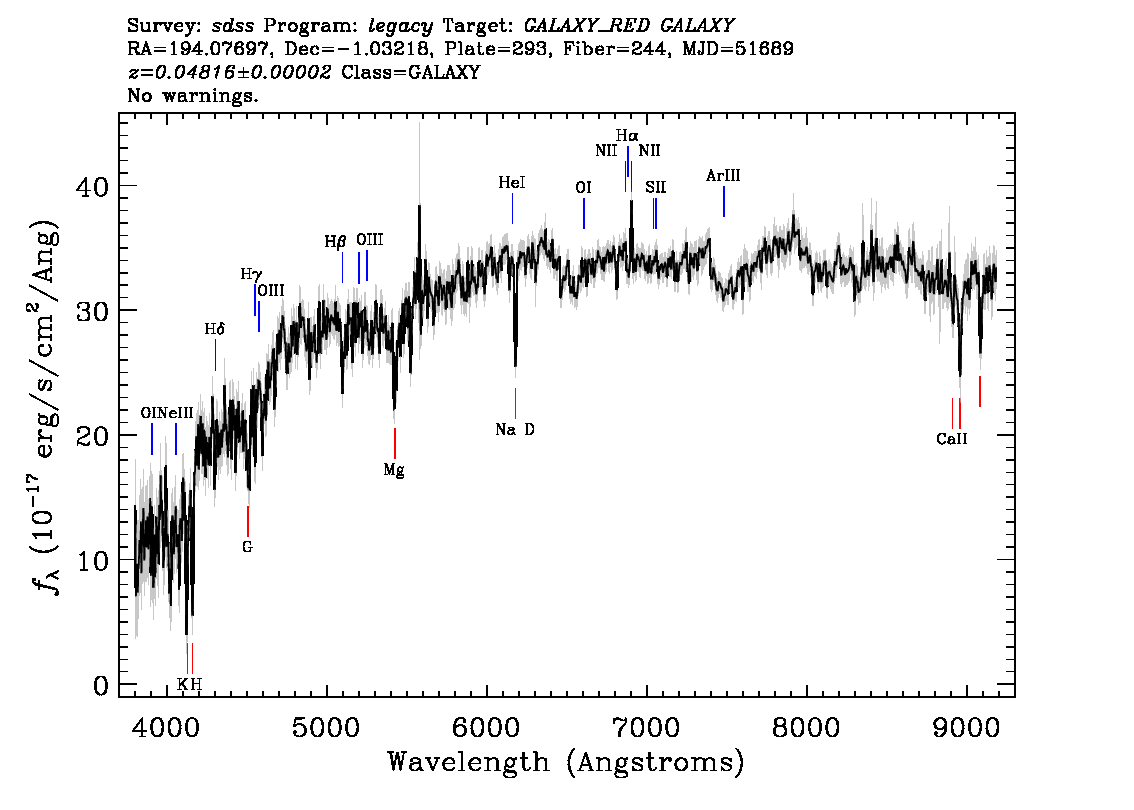

In [155]:
Image(filename='/Users/jiarongzhu/Downloads/red2_spectra.png')

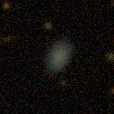

In [156]:
Image(filename='/Users/jiarongzhu/Downloads/blue1.jpg')

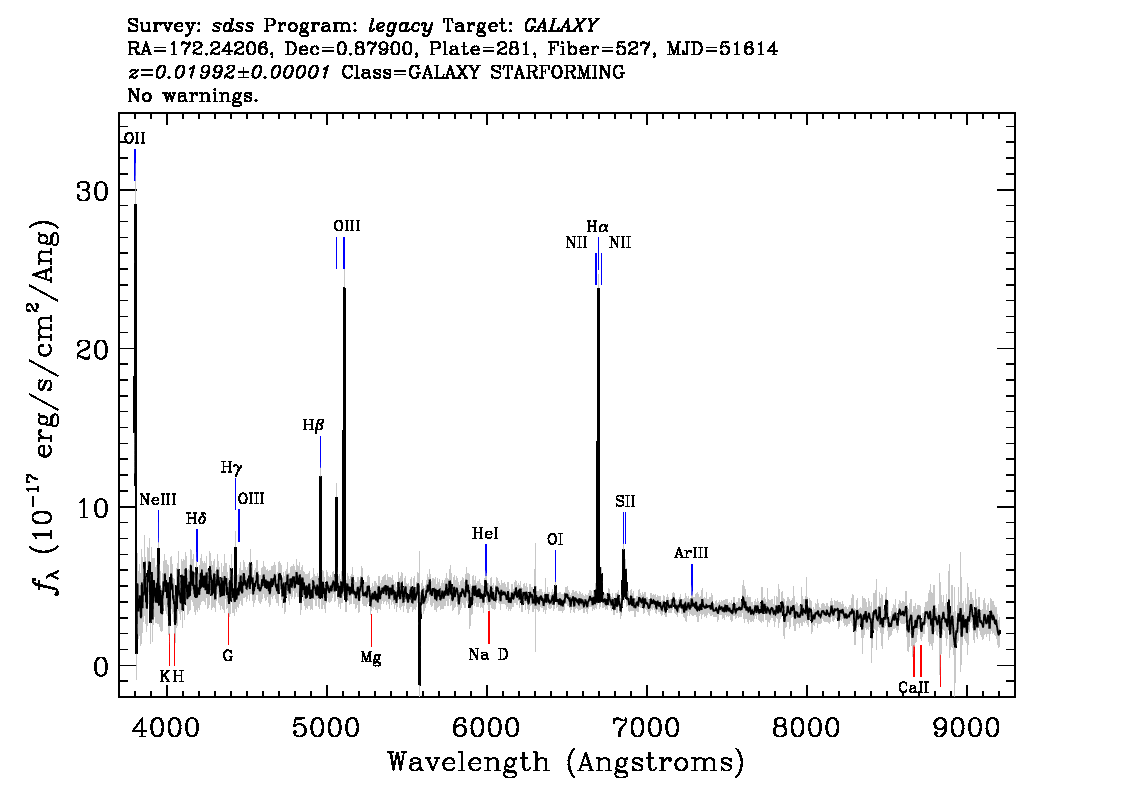

In [158]:
Image(filename='/Users/jiarongzhu/Downloads/blue1_spectra.png')

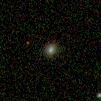

In [157]:
Image(filename='/Users/jiarongzhu/Downloads/blue2.jpg')

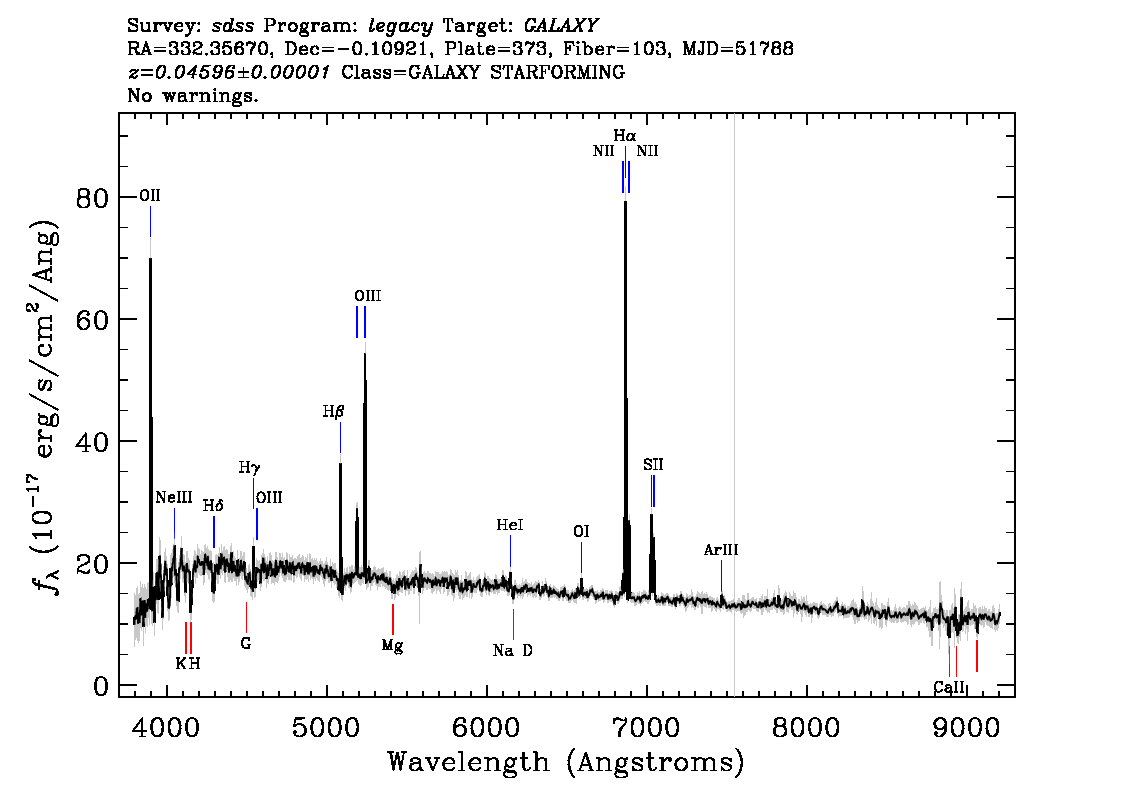

In [159]:
Image(filename='/Users/jiarongzhu/Downloads/blue2_spectra.png')

If we take a close look at these images and spectrums, we would observe at least the following differences between blue & red galaxies:
1. Blue galaxies look blue while red galaxies look red, meaning they have different temperature.
2. Blue galaxies have strong emission in Balmer series, such as H$\alpha$ emission, and significant emission in alpha elements, such as OII, OIII, while red galaxies don't have that signature. Keyword: emission.
3. Red galaxies have a clear drop off in intensity at 4000A, which indicates composition of old stellar population and lack of hot blue stars. Blue galaxies don't have that. Keyword: absorption.